In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings(action= 'ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Realtion between Missing values and SalesPrice

In [5]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>0]
print(len(features_with_na))

for feature in features_with_na:
    print(feature,'-', np.round(df[feature].isnull().mean(),3)*100, '%')

19
LotFrontage - 17.7 %
Alley - 93.8 %
MasVnrType - 0.5 %
MasVnrArea - 0.5 %
BsmtQual - 2.5 %
BsmtCond - 2.5 %
BsmtExposure - 2.6 %
BsmtFinType1 - 2.5 %
BsmtFinType2 - 2.6 %
Electrical - 0.1 %
FireplaceQu - 47.3 %
GarageType - 5.5 %
GarageYrBlt - 5.5 %
GarageFinish - 5.5 %
GarageQual - 5.5 %
GarageCond - 5.5 %
PoolQC - 99.5 %
Fence - 80.80000000000001 %
MiscFeature - 96.3 %


In [6]:
imp_features = []
for features in df.columns:
    if df[features].isnull().mean()>0.06:
        imp_features.append(features)


### Relation b/w Nan and non_Nan values.
* we take median instead of mean as we know this dataset contains outliers

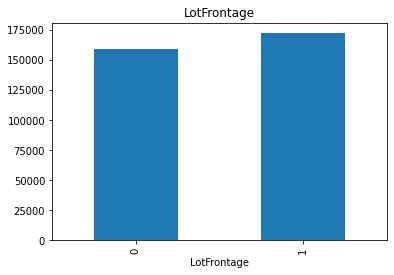

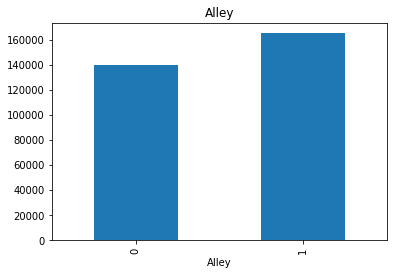

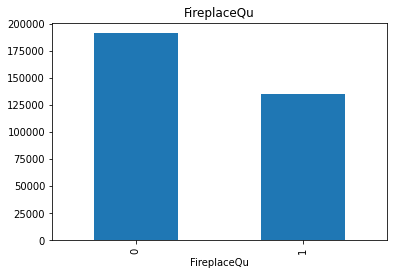

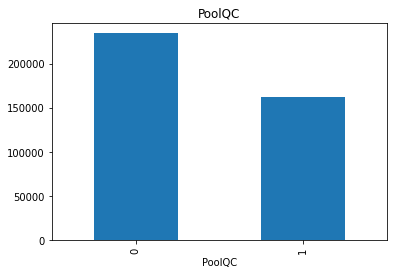

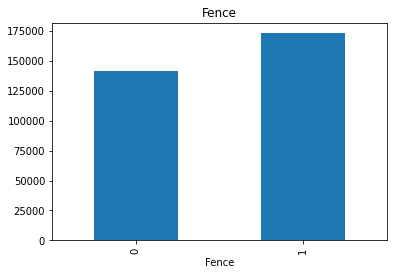

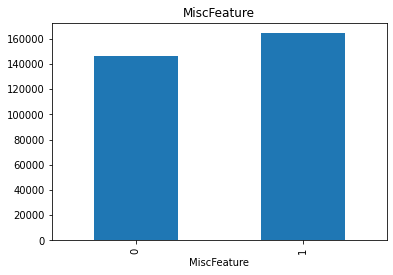

In [7]:
for feature in imp_features:
    df1=df.copy()
    df1[feature] = np.where(df1[feature].isnull(),1,0)
    
    #  plot mean SalesPrice for missing data
    df1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

# for feature in imp_features:
#     df1=df.copy()
#     df1[feature] = np.where(df1[feature].isnull(),1,0)
    
#     fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
#     df1.groupby(feature)['SalePrice'].median().plot.bar(ax=ax_before)
#     df1.groupby(feature)['SalePrice'].mean().plot.bar(ax=ax_after)
#     ax_before.set(title=feature+'_median')
#     ax_after.set(title=feature+'_mean')
#     plt.show()

#### Numerical Variables

In [8]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [9]:
num_features = [features for features in df.columns if df[features].dtypes !='O']
print('numerical varable: ', len(num_features) )

numerical varable:  38


In [10]:
yr_features = [feature for feature in num_features if 'Year'in feature or 'Yr' in feature]
yr_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

#### Visulaize different Years featutres

Text(0.5, 1.0, 'yr_sold vs Sale_price')

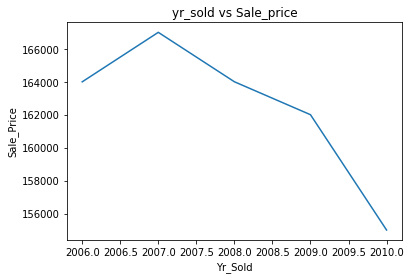

In [11]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Yr_Sold')
plt.ylabel('Sale_Price')
plt.title('yr_sold vs Sale_price')


* House_price is `decreasing` as year is increasing; that's wierd.
* let's see other year *features*

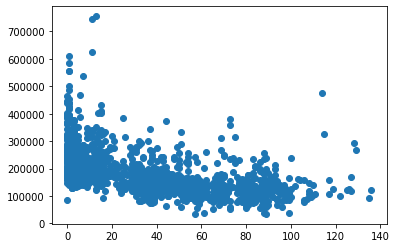

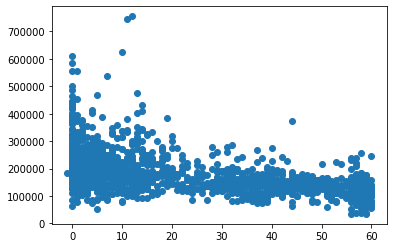

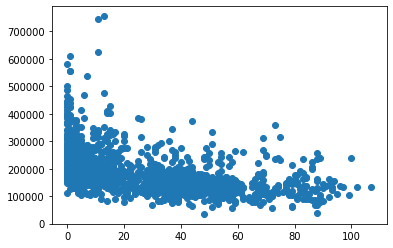

In [12]:
for feature in yr_features:
    if feature != 'YrSold':
        df1=df.copy()

        # We calculate no. of yrs of variable before year_sold    
        df1[feature] = df1['YrSold'] - df1[feature] 
        plt.scatter(df1[feature],df1['SalePrice'])
#         plt.xlabel(feature)
#         plt.ylabel('SalePrice')
        plt.show()


### Differentiating numerical variables into discrete variables and continuous variables

In [13]:
discrete_features = [feature for feature in num_features if len(df[feature].unique())<25 and feature not in yr_features+['Id']]
continuous_features = [feature for feature in num_features if len(df[feature].unique())>=25 and feature not in yr_features+['Id']]

print('Total numerical variables: ', len(num_features))
print('discrete variables: ', len(discrete_features))
print('continuous variables:', len(continuous_features))
print('year features: ', len(yr_features))

Total numerical variables:  38
discrete variables:  17
continuous variables: 16
year features:  4


#### see relation between discrete features and SalePrice

In [14]:
list(enumerate(discrete_features))

[(0, 'MSSubClass'),
 (1, 'OverallQual'),
 (2, 'OverallCond'),
 (3, 'LowQualFinSF'),
 (4, 'BsmtFullBath'),
 (5, 'BsmtHalfBath'),
 (6, 'FullBath'),
 (7, 'HalfBath'),
 (8, 'BedroomAbvGr'),
 (9, 'KitchenAbvGr'),
 (10, 'TotRmsAbvGrd'),
 (11, 'Fireplaces'),
 (12, 'GarageCars'),
 (13, '3SsnPorch'),
 (14, 'PoolArea'),
 (15, 'MiscVal'),
 (16, 'MoSold')]

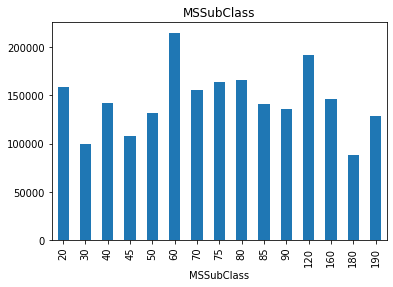

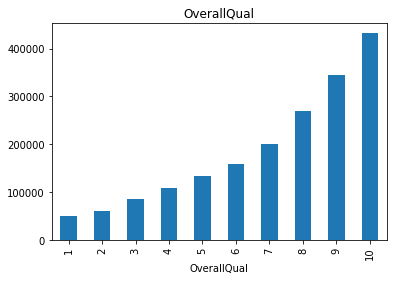

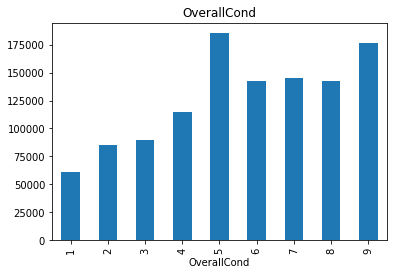

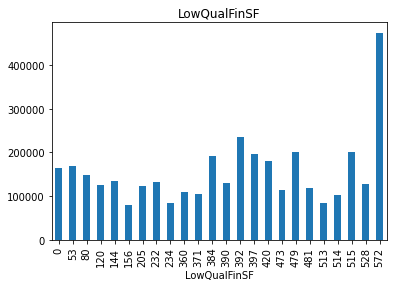

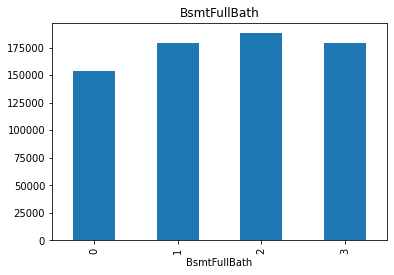

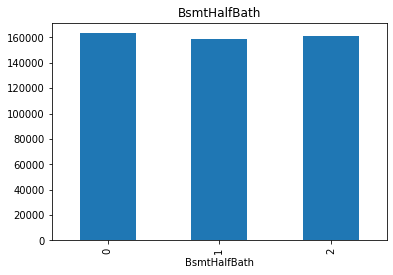

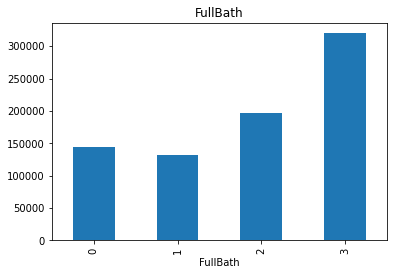

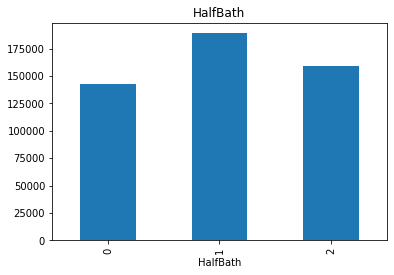

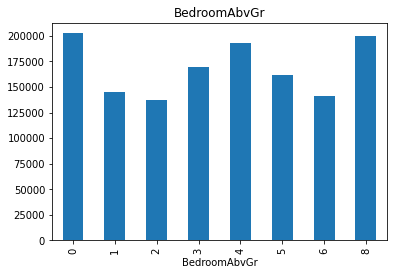

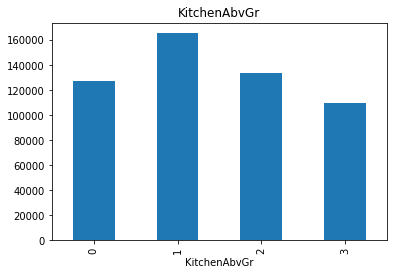

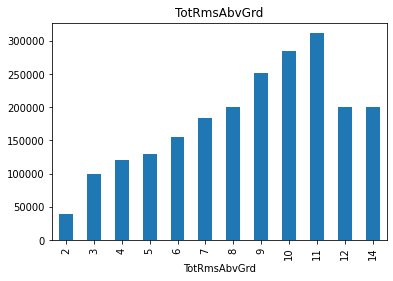

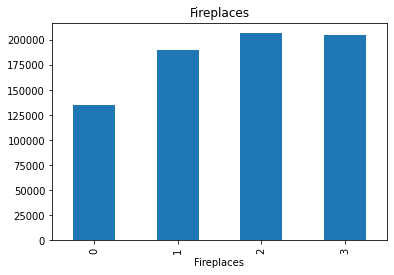

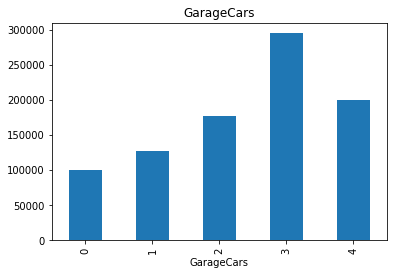

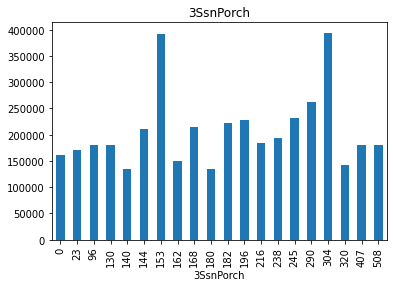

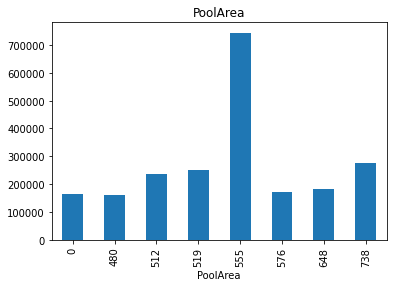

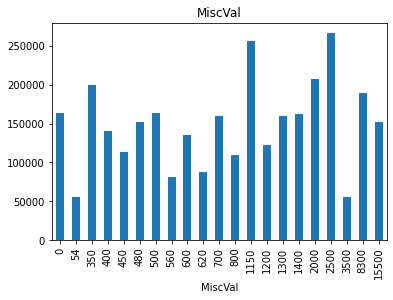

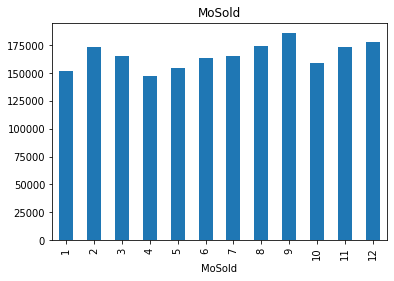

In [15]:
for index,feature in enumerate(discrete_features):
    df1=df.copy()
#     plt.subplots(row,cols,position(starts from 1))

    df1.groupby(feature)['SalePrice'].median().plot.bar()
#     plt.xlabel(feature)
#     plt.ylabel('Sales_Price')
    plt.title(feature)
    plt.show()

* We can see there are some features that are related with Sales Price

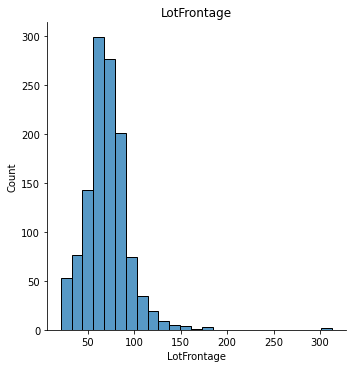

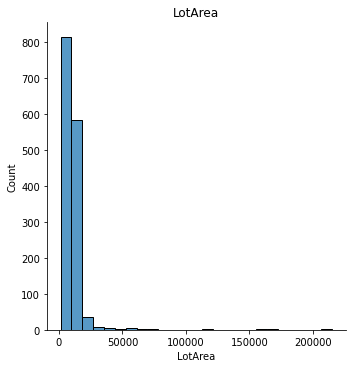

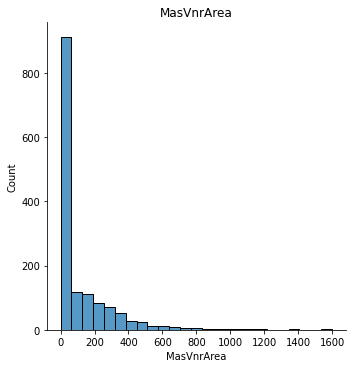

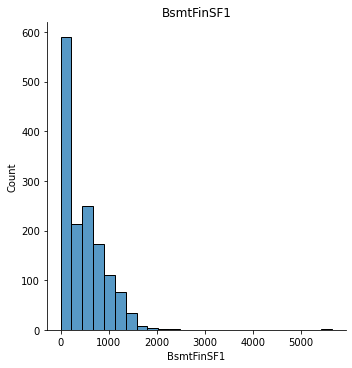

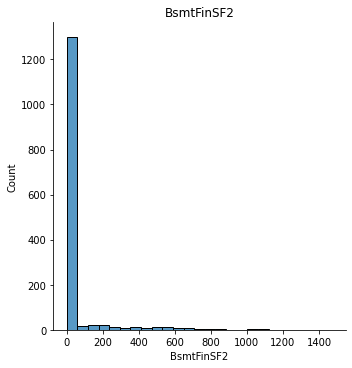

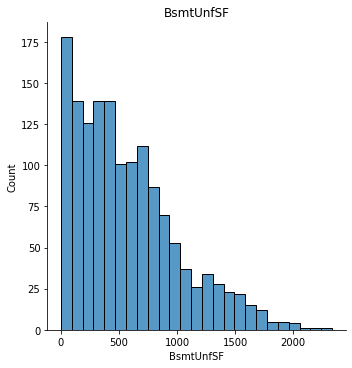

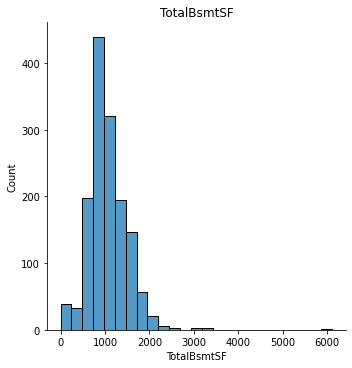

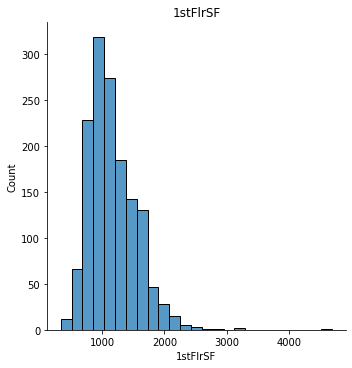

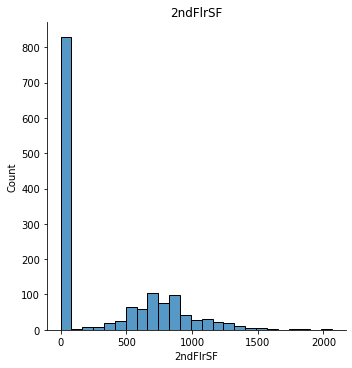

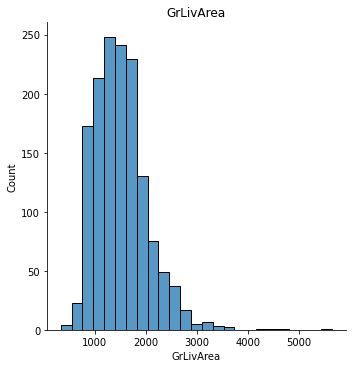

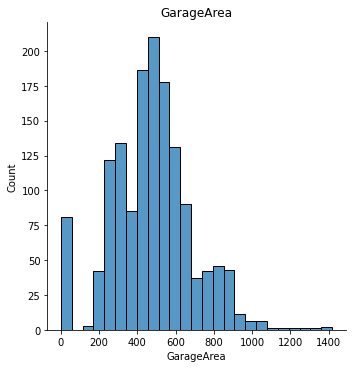

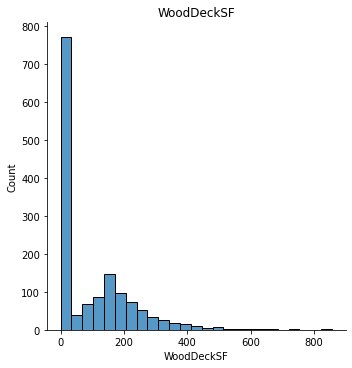

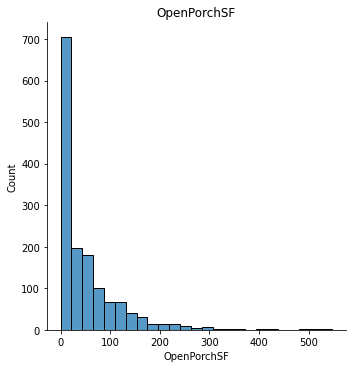

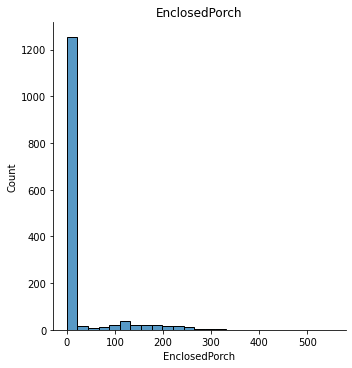

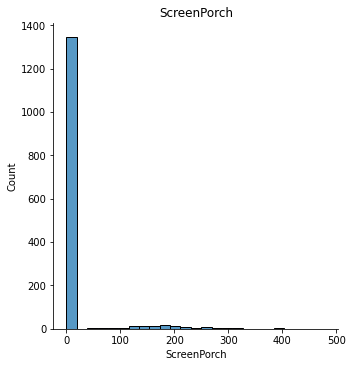

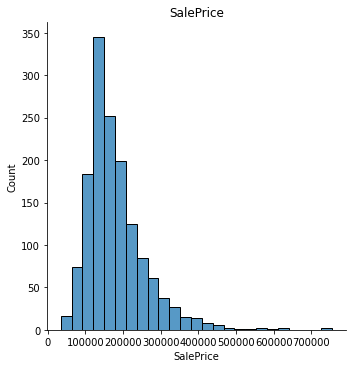

In [16]:
for feature in continuous_features:
    df1=df.copy()
    sns.displot(df[feature],bins=25)
#     plt.xlabel(feature)
#     plt.ylabel("Count")
    plt.title(feature)
    plt.show()

* Majority of continuous features does not possess gausian distribution. Let's apply some transformation on that features.

## Transforming Variables 

#### will be using Logarithmic transformation

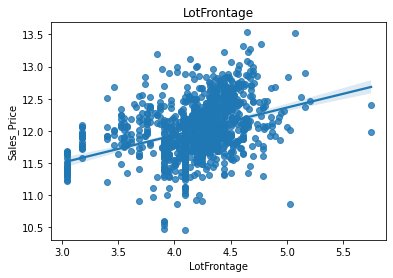

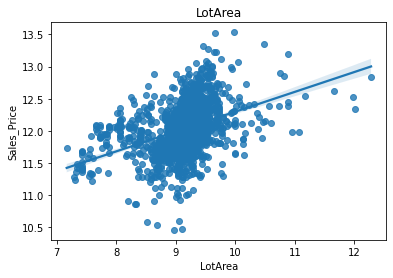

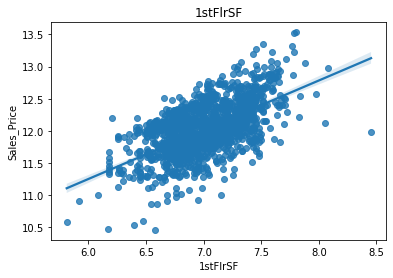

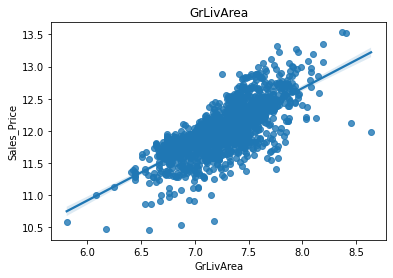

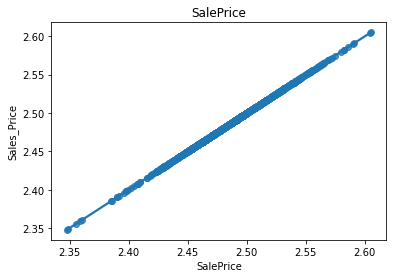

In [17]:
for feature in continuous_features:
    df1=df.copy()
    if 0 in df1[feature].unique():
        pass
    else:
        df1[feature] = np.log(df1[feature])
        df1['SalePrice'] = np.log(df1['SalePrice'])
        sns.regplot(data=df1,x=df1[feature],y=df1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sales_Price')
        plt.title(feature)
        plt.show()

## Outliers (only works for continuous features)

LotFrontage :  nan


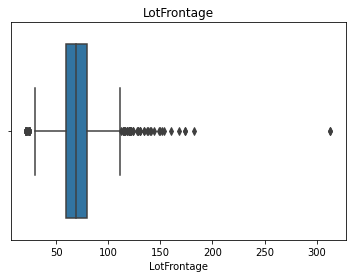

LotArea :  12.195142125084478


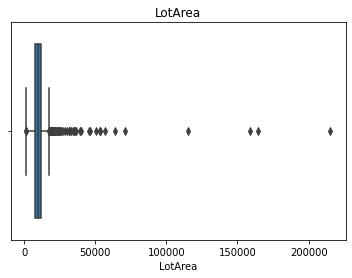

1stFlrSF :  1.3753417421837937


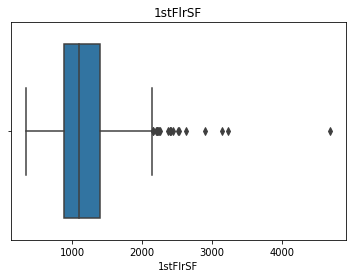

GrLivArea :  1.365155954773434


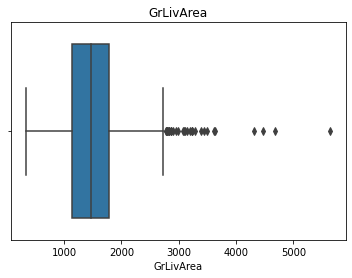

SalePrice :  1.880940746034036


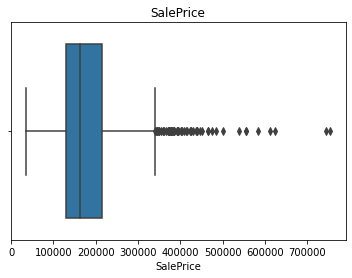

In [18]:
from scipy.stats import skew

skewed = []
for feature in continuous_features:
    df1=df.copy()
    if 0 in df1[feature].unique():
        pass
    else:
        df1[feature] = np.log(df1[feature])
        sns.boxplot(df[feature])
        print(feature,': ', skew(df[feature]))
        skewed.append(skew(df[feature])) 
        plt.title(feature)
        plt.show()

## Handling Outliers

* LotFrontage is normally distributed --> outliers are (mean + 3SD)
* LotArea,1stFlrSF,GrLivArea are Skewed --> outliers are out of IQR


#### Handling Outliers for LotFrontage (Normally distributed)

In [19]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [20]:
uppper_boundary=df['LotFrontage'].mean() + 3* df['LotFrontage'].std()
lower_boundary=df['LotFrontage'].mean() - 3* df['LotFrontage'].std()
print(lower_boundary), print(uppper_boundary),print(df['LotFrontage'].mean())


-2.80429695542297
142.9042136914763
70.04995836802665


(None, None, None)

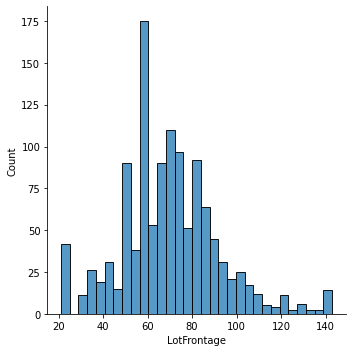

In [21]:
df.loc[df['LotFrontage']>uppper_boundary,'LotFrontage']=uppper_boundary
sns.displot(df['LotFrontage'])

#### Handling Outliers for LotArea (skewed)

In [22]:
df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [23]:
IQR=df.LotArea.quantile(0.75)-df.LotArea.quantile(0.25)

lower_bridge=df['LotArea'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['LotArea'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

1481.5
17673.5


(None, None)

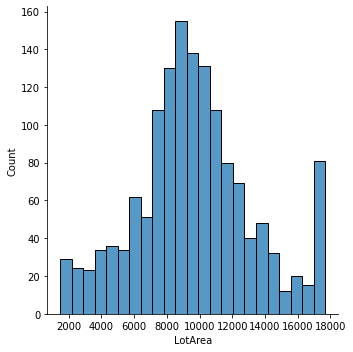

In [24]:
df.loc[df['LotArea']>upper_bridge,'LotArea']=upper_bridge
df.loc[df['LotArea']<lower_bridge,'LotArea']=upper_bridge
sns.displot(df['LotArea'])


#### Handling Outliers for 1stFlrSF (skewed)

In [25]:
df['1stFlrSF'].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

In [26]:
IQR=df['1stFlrSF'].quantile(0.75)-df['1stFlrSF'].quantile(0.25)

lower_bridge=df['1stFlrSF'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['1stFlrSF'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

118.125
2155.125


(None, None)

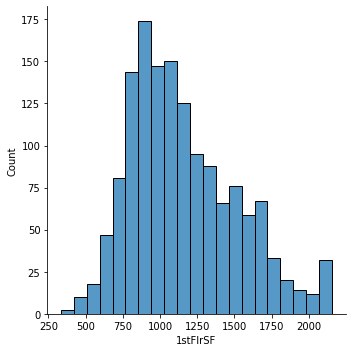

In [27]:
df.loc[df['1stFlrSF']>upper_bridge,'1stFlrSF']=upper_bridge
df.loc[df['1stFlrSF']<lower_bridge,'1stFlrSF']=upper_bridge
sns.displot(df['1stFlrSF'])

#### Handling Outliers for GrLivArea (skewed)


In [28]:
df['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [29]:
IQR=df['GrLivArea'].quantile(0.75)-df['GrLivArea'].quantile(0.25)

lower_bridge=df['GrLivArea'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['GrLivArea'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

158.625
2747.625


(None, None)

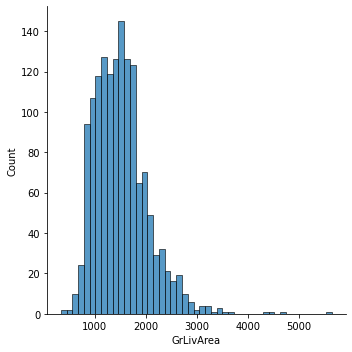

In [30]:
df.loc[df['GrLivArea']>upper_bridge,'1stFlrSF']=upper_bridge
df.loc[df['GrLivArea']<lower_bridge,'1stFlrSF']=upper_bridge
sns.displot(df['GrLivArea'])

# Categorical Variables


In [31]:
categorical_features = [features for features in df.columns if df[features].dtypes=='O']
len(categorical_features)

43

* First yo have to focus on cardinality of each categorical feature. means how many no. of category you have in that feature.

In [32]:
for feature in categorical_features:
    print(feature,': ',len(df[feature].unique()))

MSZoning :  5
Street :  2
Alley :  3
LotShape :  4
LandContour :  4
Utilities :  2
LotConfig :  5
LandSlope :  3
Neighborhood :  25
Condition1 :  9
Condition2 :  8
BldgType :  5
HouseStyle :  8
RoofStyle :  6
RoofMatl :  8
Exterior1st :  15
Exterior2nd :  16
MasVnrType :  5
ExterQual :  4
ExterCond :  5
Foundation :  6
BsmtQual :  5
BsmtCond :  5
BsmtExposure :  5
BsmtFinType1 :  7
BsmtFinType2 :  7
Heating :  6
HeatingQC :  5
CentralAir :  2
Electrical :  6
KitchenQual :  4
Functional :  7
FireplaceQu :  6
GarageType :  7
GarageFinish :  4
GarageQual :  6
GarageCond :  6
PavedDrive :  3
PoolQC :  4
Fence :  5
MiscFeature :  5
SaleType :  9
SaleCondition :  6


#### Realtion b/w categorical variables and dependent variable

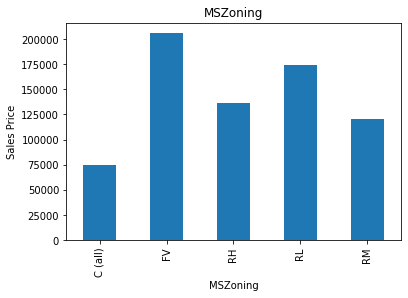

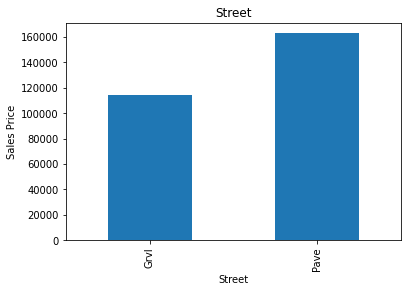

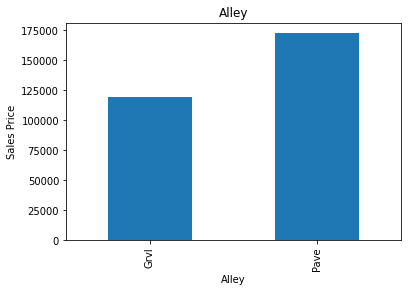

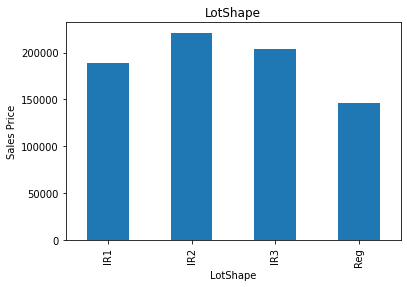

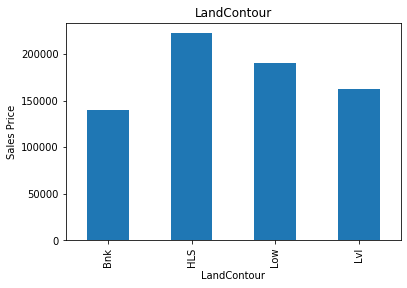

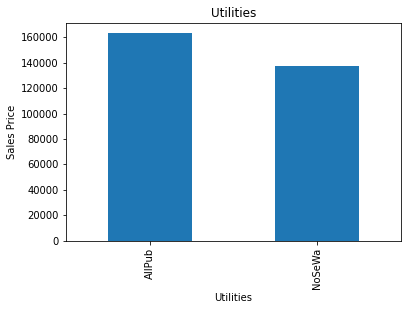

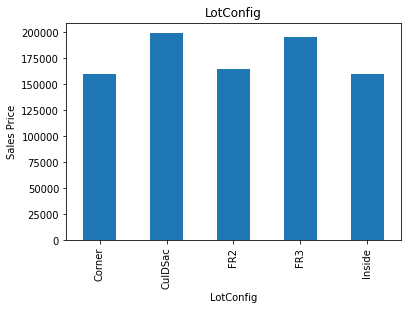

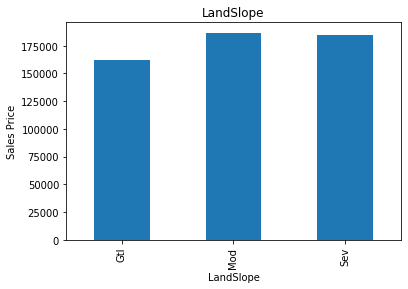

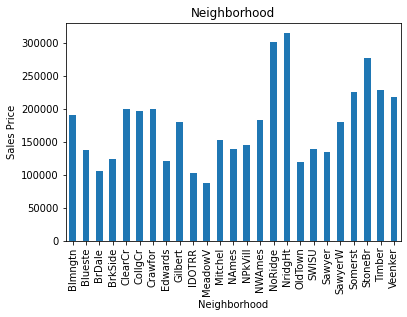

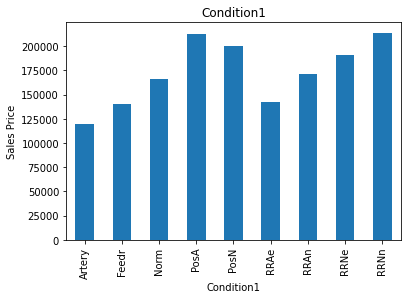

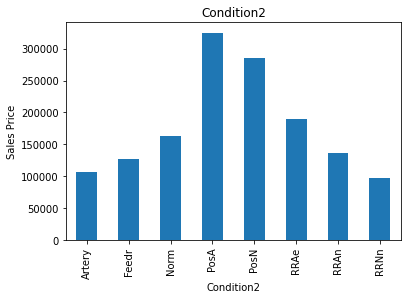

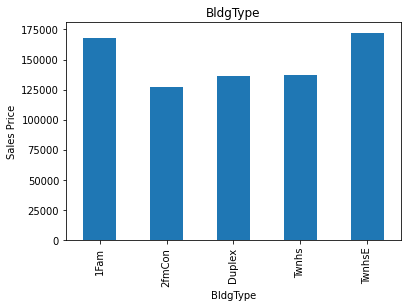

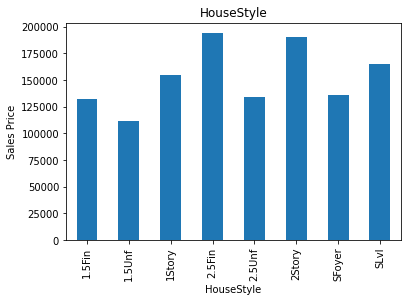

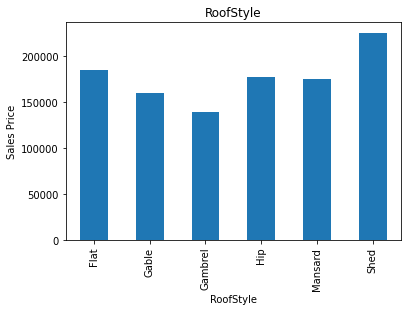

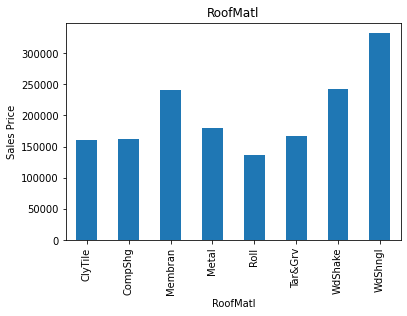

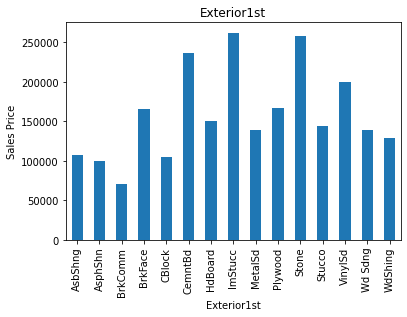

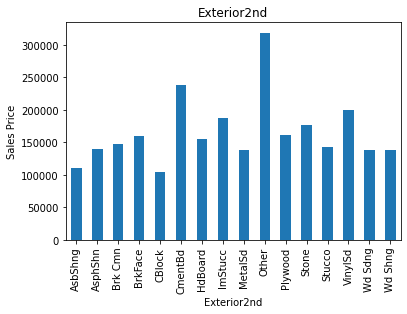

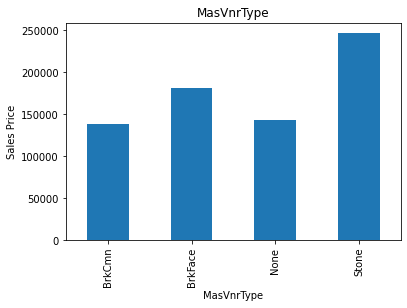

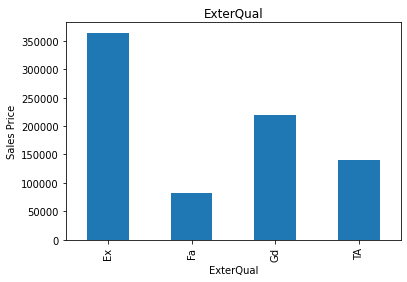

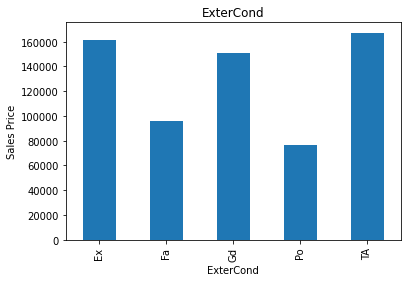

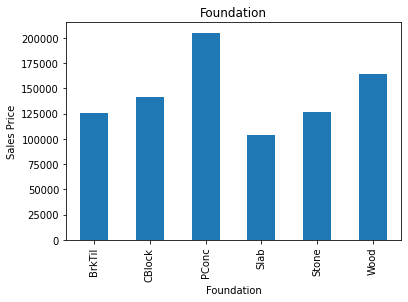

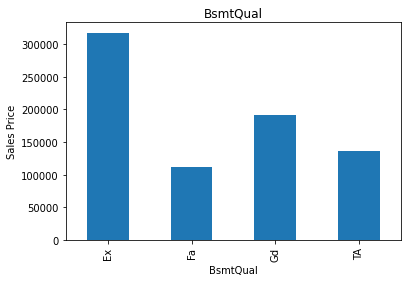

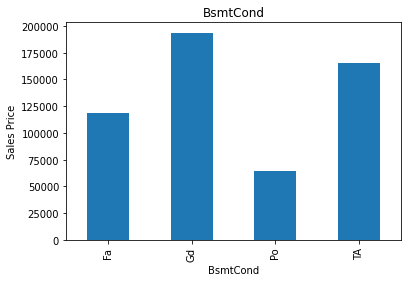

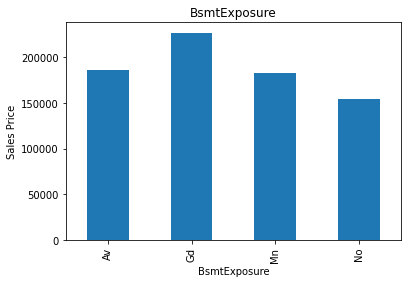

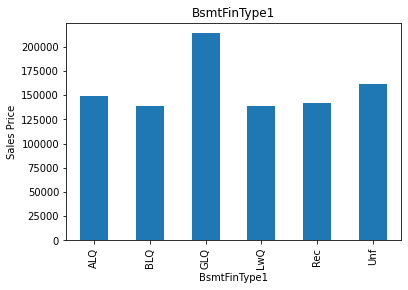

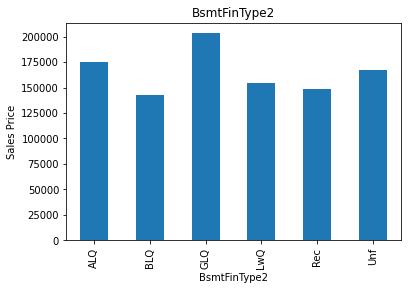

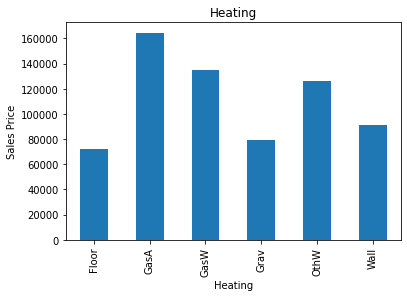

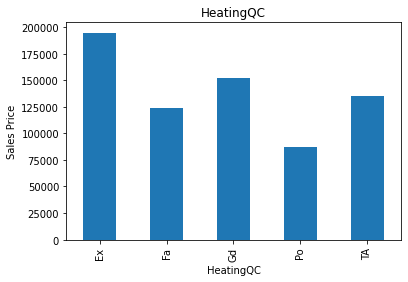

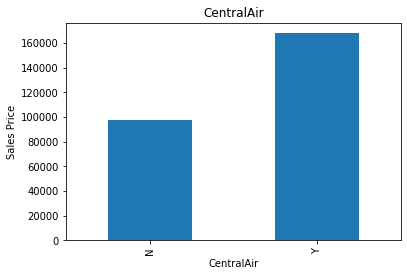

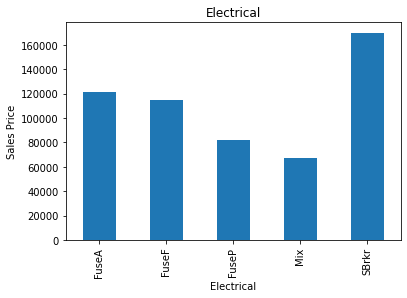

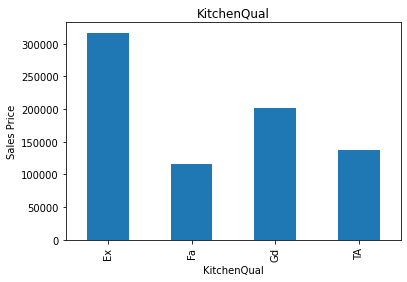

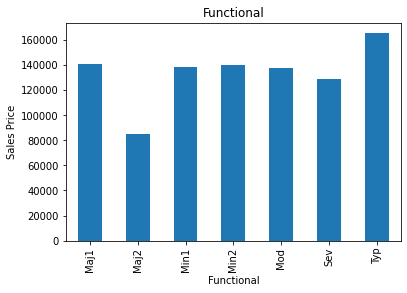

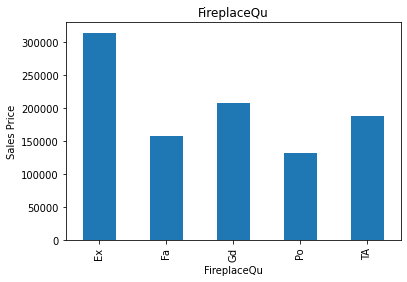

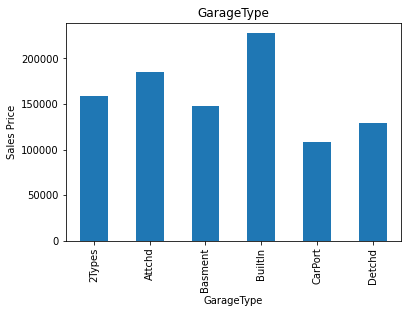

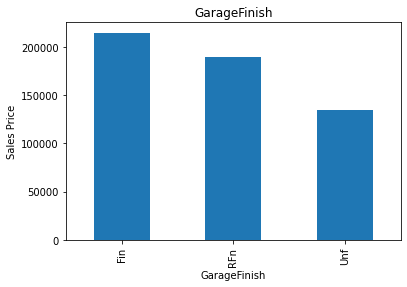

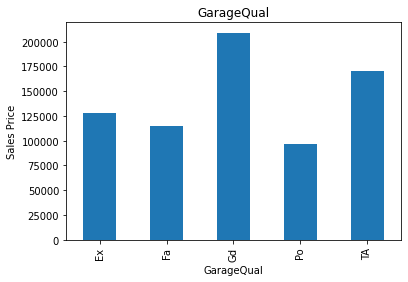

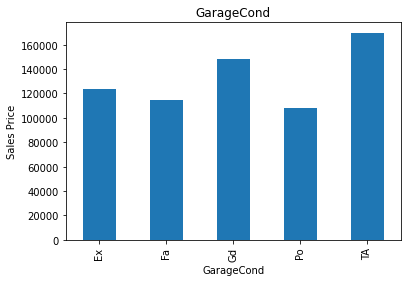

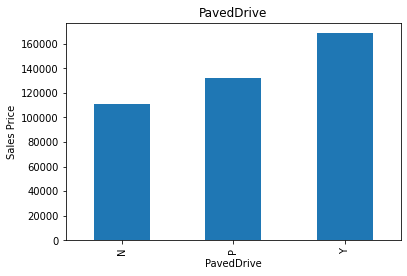

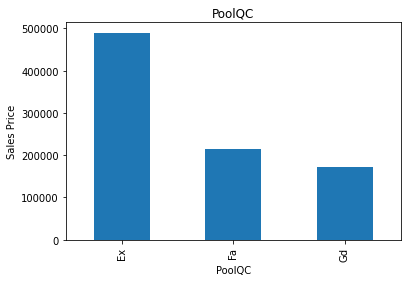

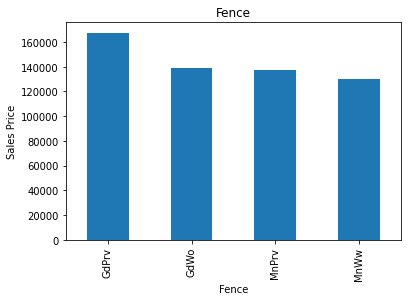

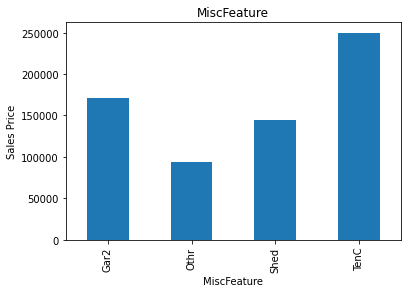

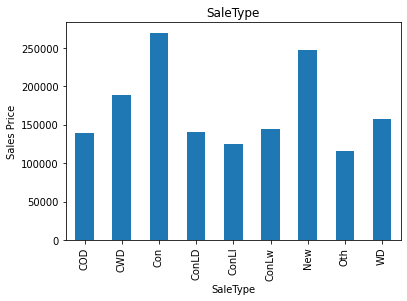

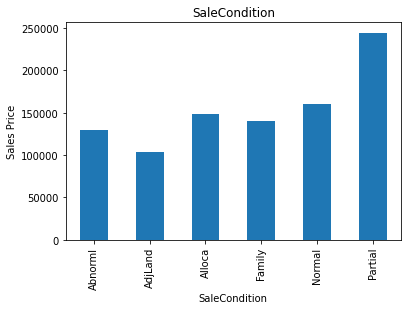

In [33]:
 for feature in categorical_features:
        df1=df.copy()
        df.groupby(feature)['SalePrice'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Sales Price')
        plt.title(feature)
        plt.show()

# FEATURE ENGINEERING

In [34]:
df.shape

(1460, 81)

### Always split data into train/test before applying feature engineering to avoid data leakage.
* first do feature engineering for test dataset and apply same procedure for test dataset

In [35]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.2,random_state=42)

In [36]:
train.shape, test.shape

((1168, 81), (292, 81))

# Feature Engineering for train dataset

## Handling missing Values
### 1. For categorical features

In [37]:
cat_nan_features = [feature for feature in train.columns if train[feature].dtypes=='O' and train[feature].isnull().sum()>0]
len(cat_nan_features)

16

In [38]:
for feature in cat_nan_features:
    print('{}: {}% missing values'.format(feature,np.round(train[feature].isnull().mean()*100,2)))


Alley: 93.66% missing values
MasVnrType: 0.51% missing values
BsmtQual: 2.4% missing values
BsmtCond: 2.4% missing values
BsmtExposure: 2.4% missing values
BsmtFinType1: 2.4% missing values
BsmtFinType2: 2.4% missing values
Electrical: 0.09% missing values
FireplaceQu: 46.83% missing values
GarageType: 5.48% missing values
GarageFinish: 5.48% missing values
GarageQual: 5.48% missing values
GarageCond: 5.48% missing values
PoolQC: 99.49% missing values
Fence: 80.05% missing values
MiscFeature: 96.06% missing values


In [39]:
def replace_missing(df,nan_features):
    data = df.copy()
    data[nan_features]=data[nan_features].fillna('missing')
    return data

In [40]:
train = replace_missing(train,cat_nan_features)
train[cat_nan_features].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [41]:
train[cat_nan_features].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
254,missing,None,TA,TA,No,Rec,Unf,SBrkr,missing,Attchd,RFn,TA,TA,missing,missing,missing
1066,missing,None,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing
638,missing,None,Fa,TA,No,Unf,Unf,FuseA,missing,missing,missing,missing,missing,missing,MnPrv,missing
799,missing,BrkFace,Gd,TA,No,ALQ,Unf,SBrkr,TA,Detchd,Unf,TA,TA,missing,MnPrv,missing
380,Pave,None,TA,TA,No,LwQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,missing,missing,missing


### 2. Handling missing values for numerical features

In [42]:
num_nan_features = [feature for feature in train.columns if train[feature].dtypes!='O' and train[feature].isnull().sum()>0]
len(num_nan_features)

3

In [43]:
for feature in num_nan_features:
    print('{}: {}% missing values'.format(feature,np.round(train[feature].isnull().mean()*100,2)))

LotFrontage: 18.58% missing values
MasVnrArea: 0.51% missing values
GarageYrBlt: 5.48% missing values


#### Creates new cols to capture nan value before replacing it with median/mode

In [44]:
for feature in num_nan_features:
    median=train[feature].median()
    
    train[feature+"_nan"] = np.where(train[feature].isnull(),1,0)
    train[feature].fillna(median,inplace=True)
    
train[num_nan_features].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Handling Temporal Variables (date/time variables)

In [45]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    train[feature] = train['YrSold']-train[feature]

In [46]:
train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
254,53,53,53.0
1066,16,15,16.0
638,98,58,28.0
799,70,57,68.0
380,86,60,86.0


### Applying log normal distribution on skewed features

In [47]:
skewed_features = ['LotFrontage',  'LotArea',  '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in skewed_features:
    train[feature] = np.log(train[feature])

### Handling rare categorical features
#### we will remove categorical features that are present less than 1% of the observation

In [48]:
# for feature in categorical_features:
#     temp = train.groupby(feature)['SalePrice'].count()/len(train)
#     # we groupby different feature and calc count of SalePrice for each category in each feature
#     # after dividing by len(df); we get fraction of each category
    
#     temp_df = temp[temp>0.01].index
#     train[feature] = np.where( train[feature].isin(temp_df), train[feature], 'Rare_cat' )

In [49]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
254,255,20,RL,4.248495,9.035987,Pave,missing,Reg,Lvl,AllPub,...,missing,0,6,2010,WD,Normal,11.884489,0,0,0
1066,1067,60,RL,4.077537,8.966611,Pave,missing,IR1,Lvl,AllPub,...,missing,0,5,2009,WD,Normal,12.089539,0,0,0
638,639,30,RL,4.204693,9.079890,Pave,missing,Reg,Lvl,AllPub,...,missing,0,5,2008,WD,Normal,11.350407,0,0,1
799,800,50,RL,4.094345,8.881836,Pave,missing,Reg,Lvl,AllPub,...,missing,0,6,2007,WD,Normal,12.072541,0,0,0
380,381,50,RL,3.912023,8.517193,Pave,Pave,Reg,Lvl,AllPub,...,missing,0,5,2010,WD,Normal,11.751942,0,0,0


### Using label encoding
First sort different category of feaures according to mean_SalePrice of each category and then label them with respective value 

In [50]:
all_labels = []

for feature in categorical_features:
    labels_ordered = train.groupby(feature)['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    all_labels.append(labels_ordered)
    train[feature]=train[feature].map(labels_ordered)
    
print(all_labels)

[{'C (all)': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}, {'Grvl': 0, 'Pave': 1}, {'Grvl': 0, 'Pave': 1, 'missing': 2}, {'Reg': 0, 'IR1': 1, 'IR3': 2, 'IR2': 3}, {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}, {'NoSeWa': 0, 'AllPub': 1}, {'Corner': 0, 'Inside': 1, 'FR2': 2, 'FR3': 3, 'CulDSac': 4}, {'Gtl': 0, 'Mod': 1, 'Sev': 2}, {'MeadowV': 0, 'BrDale': 1, 'IDOTRR': 2, 'BrkSide': 3, 'Edwards': 4, 'Blueste': 5, 'OldTown': 6, 'Sawyer': 7, 'SWISU': 8, 'NAmes': 9, 'NPkVill': 10, 'Mitchel': 11, 'SawyerW': 12, 'NWAmes': 13, 'Blmngtn': 14, 'Gilbert': 15, 'CollgCr': 16, 'Crawfor': 17, 'ClearCr': 18, 'Somerst': 19, 'Timber': 20, 'Veenker': 21, 'StoneBr': 22, 'NridgHt': 23, 'NoRidge': 24}, {'Artery': 0, 'Feedr': 1, 'RRAe': 2, 'Norm': 3, 'RRNe': 4, 'RRAn': 5, 'RRNn': 6, 'PosN': 7, 'PosA': 8}, {'Artery': 0, 'Feedr': 1, 'RRNn': 2, 'RRAn': 3, 'Norm': 4, 'RRAe': 5, 'PosN': 6, 'PosA': 7}, {'2fmCon': 0, 'Twnhs': 1, 'Duplex': 2, '1Fam': 3, 'TwnhsE': 4}, {'1.5Unf': 0, '1.5Fin': 1, 'SFoyer': 2, '2.5Unf': 3, 'SLvl':

In [51]:
# for feature in categorical_features:
#     labels_ordered = train.groupby(feature)['SalePrice'].mean().sort_values().index
#     labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
#     print(labels_ordered)

In [52]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
254,255,20,3,4.248495,9.035987,1,2,0,1,1,...,2,0,6,2010,5,3,11.884489,0,0,0
1066,1067,60,3,4.077537,8.966611,1,2,1,1,1,...,2,0,5,2009,5,3,12.089539,0,0,0
638,639,30,3,4.204693,9.079890,1,2,0,1,1,...,2,0,5,2008,5,3,11.350407,0,0,1
799,800,50,3,4.094345,8.881836,1,2,0,1,1,...,2,0,6,2007,5,3,12.072541,0,0,0
380,381,50,3,3.912023,8.517193,1,1,0,1,1,...,2,0,5,2010,5,3,11.751942,0,0,0


## Feature Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler as MMS

scaled_features = [feature for feature in train.columns if feature not in ['Id','SalePrice'] ]
scaler = MMS()
scaler.fit(train[scaled_features])

MinMaxScaler()

In [54]:
train_data = pd.concat([train[['Id','SalePrice']].reset_index(drop=True),
                     pd.DataFrame(scaler.transform(train[scaled_features]), columns=scaled_features)], axis=1)

In [55]:
train_data.head(10)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,255,11.884489,0.000000,0.75,0.627837,0.696322,1.0,1.0,0.000000,0.333333,...,0.75,0.5,0.0,0.454545,1.00,0.625,0.6,0.0,0.0,0.0
1,1067,12.089539,0.235294,0.75,0.538687,0.667998,1.0,1.0,0.333333,0.333333,...,0.75,0.5,0.0,0.363636,0.75,0.625,0.6,0.0,0.0,0.0
2,639,11.350407,0.058824,0.75,0.604995,0.714246,1.0,1.0,0.000000,0.333333,...,0.50,0.5,0.0,0.363636,0.50,0.625,0.6,0.0,0.0,1.0
3,800,12.072541,0.176471,0.75,0.547452,0.633388,1.0,1.0,0.000000,0.333333,...,0.50,0.5,0.0,0.454545,0.25,0.625,0.6,0.0,0.0,0.0
4,381,11.751942,0.176471,0.75,0.452376,0.484519,1.0,0.5,0.000000,0.333333,...,0.75,0.5,0.0,0.363636,1.00,0.625,0.6,0.0,0.0,0.0
5,304,11.917724,0.000000,0.75,0.627837,0.759255,1.0,1.0,0.000000,0.333333,...,0.00,0.5,0.0,0.545455,0.00,0.625,0.2,0.0,0.0,0.0
6,87,12.066811,0.235294,0.75,0.917528,0.838899,1.0,1.0,1.000000,0.333333,...,0.75,0.5,0.0,0.181818,0.75,0.625,0.6,0.0,0.0,0.0
7,1386,11.740061,0.176471,0.25,0.336014,0.518652,1.0,1.0,0.000000,0.333333,...,0.50,0.5,0.0,0.363636,1.00,0.625,0.6,0.0,0.0,0.0
8,266,12.075394,0.000000,0.75,0.684267,0.844989,1.0,1.0,0.333333,0.333333,...,1.00,0.5,0.0,0.454545,0.50,0.625,0.6,0.0,0.0,0.0
9,794,12.323856,0.000000,0.75,0.670722,0.731594,1.0,1.0,0.000000,0.333333,...,0.75,0.5,0.0,0.454545,0.25,0.875,1.0,0.0,0.0,0.0


In [56]:
x_train = train_data.drop(['Id','SalePrice'], axis=1)
y_train = train_data['SalePrice']
x_train.shape , y_train.shape

((1168, 82), (1168,))

In [57]:
train_data.to_csv('train_x.csv', index=False)

## Feature Engineering for Test dataset

In [58]:
cat_nan_features = [feature for feature in test.columns if test[feature].dtypes=='O' and test[feature].isnull().sum()>0]

test = replace_missing(test,cat_nan_features)
test[cat_nan_features].isnull().sum()

num_nan_features = [feature for feature in test.columns if test[feature].dtypes!='O' and test[feature].isnull().sum()>0]

for feature in num_nan_features:
    median=test[feature].median()
    
    test[feature+"_nan"] = np.where(test[feature].isnull(),1,0)
    test[feature].fillna(median,inplace=True)
    
test[num_nan_features].isnull().sum()


for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    test[feature] = test['YrSold']-test[feature]
    
skewed_features = ['LotFrontage',  'LotArea',  '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in skewed_features:
    test[feature] = np.log(test[feature])
    
    
for feature in categorical_features:
    temp = test.groupby(feature)['SalePrice'].count()/len(test)
    temp_df = temp[temp>0.01].index
    test[feature] = np.where( test[feature].isin(temp_df), test[feature], 'Rare_cat' )

    
for feature in categorical_features:
    labels_ordered = test.groupby(feature)['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    test[feature]=test[feature].map(labels_ordered)
    

scaled_features = [feature for feature in test.columns if feature not in ['Id','SalePrice'] ]
scaler = MMS()
scaler.fit(test[scaled_features])

test_data = pd.concat([test[['Id','SalePrice']].reset_index(drop=True),
                     pd.DataFrame(scaler.transform(test[scaled_features]), columns=scaled_features)], axis=1)

In [59]:
x_test = test.drop(['Id','SalePrice'], axis=1)
y_test = test['SalePrice']
x_test.shape , y_test.shape

((292, 82), (292,))

## Feature Selection



In [60]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,0.000000,0.75,0.627837,0.696322,1.0,1.0,0.000000,0.333333,1.0,0.25,...,0.75,0.5,0.0,0.454545,1.00,0.625,0.6,0.0,0.0,0.0
1,0.235294,0.75,0.538687,0.667998,1.0,1.0,0.333333,0.333333,1.0,0.25,...,0.75,0.5,0.0,0.363636,0.75,0.625,0.6,0.0,0.0,0.0
2,0.058824,0.75,0.604995,0.714246,1.0,1.0,0.000000,0.333333,1.0,0.25,...,0.50,0.5,0.0,0.363636,0.50,0.625,0.6,0.0,0.0,1.0
3,0.176471,0.75,0.547452,0.633388,1.0,1.0,0.000000,0.333333,1.0,0.00,...,0.50,0.5,0.0,0.454545,0.25,0.625,0.6,0.0,0.0,0.0
4,0.176471,0.75,0.452376,0.484519,1.0,0.5,0.000000,0.333333,1.0,0.25,...,0.75,0.5,0.0,0.363636,1.00,0.625,0.6,0.0,0.0,0.0


In [61]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# SelectFromModel selects features from model whose. coefficient is non-zero

In [62]:
model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
# remeber the seed value(random_state value); you have to use same value for test dataset
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

#### get_support():- True indicates, that feature is important and that should be used

In [63]:
model.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True, False, False,  True, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

Let's print total features and selected features

In [64]:
selected_features = x_train.columns[(model.get_support())]
selected_features

Index(['LotArea', 'Neighborhood', 'OverallQual', 'YearRemodAdd', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'KitchenQual',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageCond'],
      dtype='object')

In [65]:
print('Total features: {}'.format(x_train.shape[1]))
print('selected features: {}'.format(len(selected_features)))
print("features with coeffecient zero: {}".format(np.sum(model.estimator_.coef_ == 0)))

Total features: 82
selected features: 21
features with coeffecient zero: 61


In [66]:
train_x = x_train[selected_features]
train_y = train_data['SalePrice']

test_x = x_test[selected_features]
test_y = test_data['SalePrice']

train_x.shape , train_y.shape

((1168, 21), (1168,))

In [67]:
train_x.corr()

,LotArea,Neighborhood,OverallQual,YearRemodAdd,Foundation,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,...,GrLivArea,BsmtFullBath,HalfBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond
LotArea,1.000000,0.252932,0.181287,-0.033511,0.001252,0.108111,0.174953,0.058520,0.078106,0.456076,...,0.381188,0.125231,0.072655,0.111989,0.315158,0.279981,0.286572,0.192341,0.282157,0.142816
Neighborhood,0.252932,1.000000,0.669511,-0.533019,0.580733,0.610465,0.271885,0.435072,0.269962,0.374268,...,0.439559,0.126094,0.223589,0.571499,0.296587,0.378705,0.516497,0.529996,0.580142,0.302061
OverallQual,0.181287,0.669511,1.000000,-0.539880,0.552742,0.657746,0.290368,0.462601,0.270798,0.446695,...,0.604482,0.091070,0.266661,0.679631,0.384819,0.496269,0.480237,0.547156,0.587487,0.296057
YearRemodAdd,-0.033511,-0.533019,-0.539880,1.000000,-0.578878,-0.553253,-0.225156,-0.561549,-0.306350,-0.223779,...,-0.308764,-0.104525,-0.172505,-0.629502,-0.102539,-0.198504,-0.347811,-0.441743,-0.416825,-0.170137
Foundation,0.001252,0.580733,0.552742,-0.578878,1.000000,0.640699,0.228270,0.544976,0.255628,0.174472,...,0.296380,0.103745,0.186601,0.536300,0.079930,0.189952,0.392158,0.487125,0.426441,0.190622
BsmtQual,0.108111,0.610465,0.657746,-0.553253,0.640699,1.000000,0.379410,0.432064,0.289340,0.300941,...,0.358927,0.217018,0.208777,0.552543,0.217492,0.307150,0.444195,0.522503,0.492814,0.252646
BsmtExposure,0.174953,0.271885,0.290368,-0.225156,0.228270,0.379410,1.000000,0.150254,0.143598,0.270854,...,0.106858,0.335690,-0.036482,0.256820,0.161712,0.137905,0.228992,0.244696,0.263406,0.091686
HeatingQC,0.058520,0.435072,0.462601,-0.561549,0.544976,0.432064,0.150254,1.000000,0.316223,0.196857,...,0.282787,0.081239,0.112017,0.516177,0.137420,0.232928,0.313168,0.407432,0.337559,0.168424
CentralAir,0.078106,0.269962,0.270798,-0.306350,0.255628,0.289340,0.143598,0.316223,1.000000,0.188877,...,0.125176,0.123853,0.137987,0.272678,0.197951,0.179925,0.371841,0.302393,0.247180,0.350191
1stFlrSF,0.456076,0.374268,0.446695,-0.223779,0.174472,0.300941,0.270854,0.196857,0.188877,1.000000,...,0.563137,0.223550,-0.124607,0.352447,0.404211,0.399355,0.348437,0.313353,0.445103,0.217930


* We apply correlatioon after removing some features because it is very difficult to see correlation for 81 features together

<AxesSubplot:>

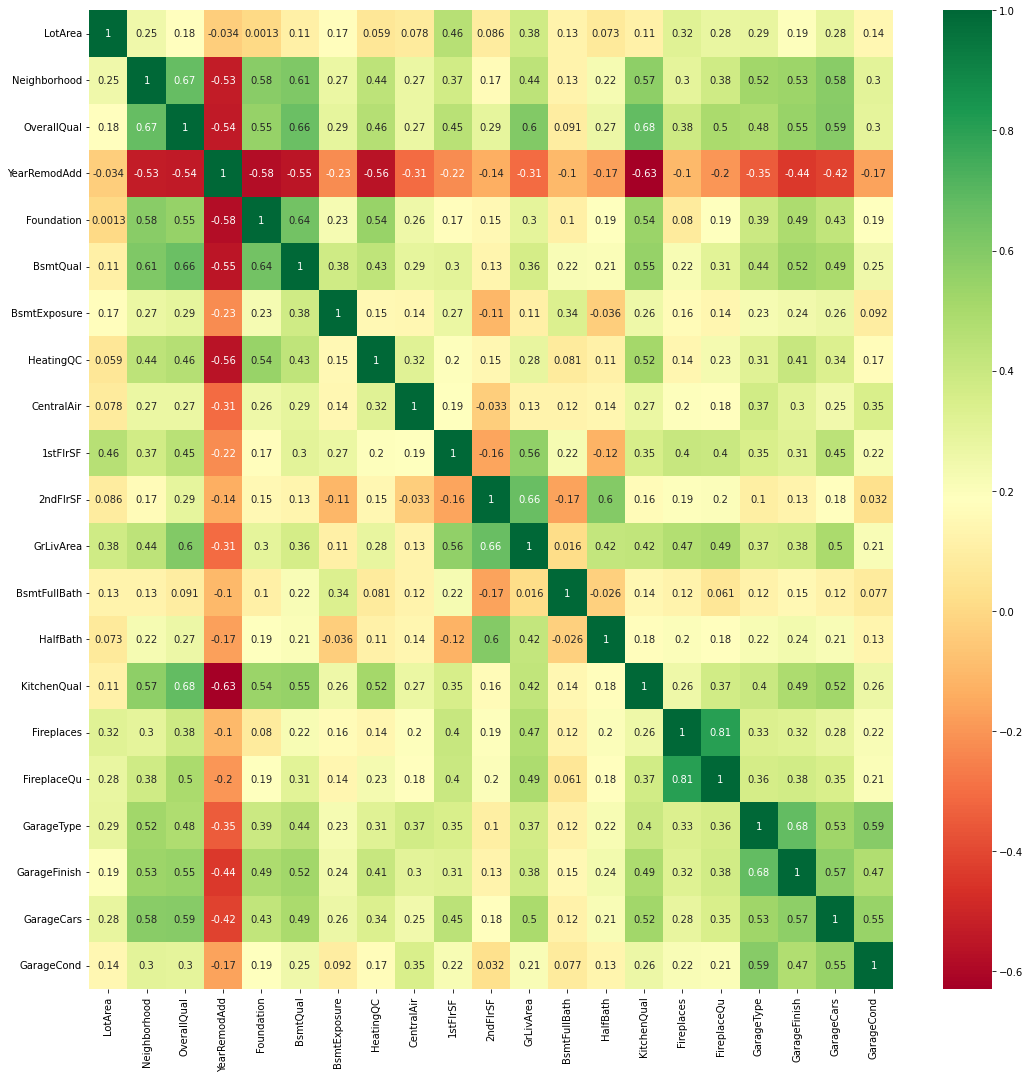

In [68]:
plt.figure(figsize=(18,18))
sns.heatmap(train_x.corr(),annot=True, cmap='RdYlGn')

# Model Creation

## 1. Linear Regression


In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lin_reg = LinearRegression()
lin_reg.fit(train_x,train_y)
y_pred = lin_reg.predict(test_x)

Coefficients of this model are not of much use as other model performs better than linear regression

In [70]:
coef_df = pd.DataFrame(lin_reg.coef_, test_x.columns, 
                       columns=['Coefficients'])
coef_df

,Coefficients
LotArea,0.193184
Neighborhood,0.254686
OverallQual,0.548552
YearRemodAdd,-0.075464
Foundation,0.015762
BsmtQual,0.110911
BsmtExposure,0.076264
HeatingQC,0.048111
CentralAir,0.103954
1stFlrSF,0.499662


In [71]:
from sklearn import metrics

linear_score = cross_val_score(lin_reg,test_x,test_y,cv=5)
print('Cross Val Score: ', linear_score.mean())
print('R2 score:',r2_score(test_y, y_pred))
print('Mean Absolute Error:', mean_absolute_error(test_y, y_pred))
print('Mean Squared Error:',mean_squared_error(test_y, y_pred))

linear_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', linear_RMSE )


Cross Val Score:  0.8618835110254427
R2 score: -74343.66233023888
Mean Absolute Error: 78.71008438227824
Mean Squared Error: 13873.719000397617
Root Mean Squared Error: 117.78675222790388


## 2. Ridge Regression

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


kf = KFold(shuffle=True, random_state=0, n_splits=3)

estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
                      ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': [1e-15,1e-10,1e-8,1e-3,0.005,1e-2,0.05,0.1,0.5,1,5,10,20,30,35,40]
}
# 'alpha':[1e-15,1e-10,1e-8,1e-3,0.005,1e-2,0.05,0.1,0.5,1,5,10,20,30,35,40]

grid = GridSearchCV(estimator, params, cv=kf)

grid.fit(train_x,train_y)
print('best score: {}'.format(grid.best_score_))
print('best score: {}'.format(grid.best_params_))


best score: 0.8784272893408674
best score: {'polynomial_features__degree': 1, 'ridge_regression__alpha': 1}


* Best value of alpha for Ridge is 0.1

In [73]:
ridge = Ridge(alpha=0.1)

ridge.fit(train_x,train_y)
y_pred = ridge.predict(test_x)

ridge_score = cross_val_score(ridge,test_x,test_y,cv=10)
print('Cross Val Score: ', ridge_score.mean())

ridge_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', ridge_RMSE)



Cross Val Score:  0.8633714088709883
Root Mean Squared Error: 117.760708088883


## 3. LASSO Regression

In [74]:
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,0.005,1e-2,0.05,0.1,0.5,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=kf)

lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
0.8871279604997054


* Best value of alpha for Lasso is 0.001

In [75]:
lasso = Lasso(alpha=0.001)

lasso.fit(train_x,train_y)
y_pred = lasso.predict(test_x)

lasso_score = cross_val_score(lasso,test_x,test_y,cv=10)
print('Cross Val Score: ', lasso_score.mean())

lasso_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', lasso_RMSE)


Cross Val Score:  0.865076453182764
Root Mean Squared Error: 115.32825012605257


### Compare Linear/Ridge/Lasso

In [76]:
print('Linear Regression score: {} , RMSE: {}'.format(linear_score.mean(),linear_RMSE))
print('Ridge Regression score: {} , RMSE: {}'.format(ridge_score.mean(),ridge_RMSE))
print('Lasso Regression score: {} , RMSE: {}'.format(lasso_score.mean() ,lasso_RMSE))

Linear Regression score: 0.8618835110254427 , RMSE: 117.78675222790388
Ridge Regression score: 0.8633714088709883 , RMSE: 117.760708088883
Lasso Regression score: 0.865076453182764 , RMSE: 115.32825012605257


#### Lasso Regression performs better than Linear and Ridge Regression
* it has highest CV score score and least RMSE

## 4. K-Nearest-Neighbour Regressor


Best K-value: 5


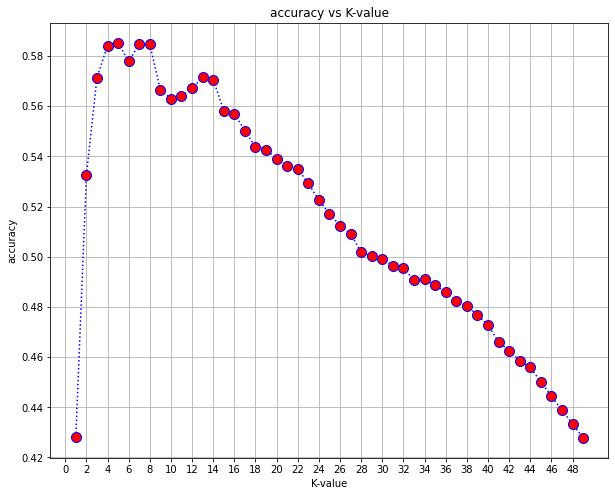

In [77]:
from sklearn.neighbors import KNeighborsRegressor

accuracy=[]
k=0
temp=0
for n in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=n)
    result= cross_val_score(knn, test_x, test_y, cv=10)
    accuracy.append(result.mean())
    if (result.mean() > temp):
        temp=result.mean()
        k=n
    
    
plt.figure(figsize=(10,8))
axes = plt.axes()
axes.grid()
plt.plot(range(1,50), accuracy, color='blue', linestyle=':',
        marker='o', markerfacecolor='red',markersize=10 )
plt.title('accuracy vs K-value')
plt.xlabel('K-value')
plt.xticks(range(0,50,2))
plt.ylabel('accuracy')

print('Best K-value: {}'.format(k))

In [78]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(train_x,train_y)
y_pred = knn.predict(test_x)

knn_score = cross_val_score(knn,test_x,test_y,cv=10)
print('Cross Val Score: ', knn_score.mean())

knn_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', knn_RMSE)



Cross Val Score:  0.5713582573767116
Root Mean Squared Error: 1.0039855880408521


## 5. SVM Regressor

In [79]:
from sklearn.svm import SVR

svm_regressor = SVR()
parameters = {'kernel':['poly','rbf'] , 'degree':[2,3,4,5] }
svm_reg = GridSearchCV(svm_regressor,parameters,cv=kf)

svm_reg.fit(train_x,train_y)
print('Best Parameters: {}'.format(svm_reg.best_params_))
print('Best SCore: {}'.format(svm_reg.best_score_))

Best Parameters: {'degree': 2, 'kernel': 'rbf'}
Best SCore: 0.875170059755192


In [80]:
svm_regressor = SVR(kernel='rbf', degree=2)
svm_regressor.fit(train_x,train_y)
y_pred = svm_regressor.predict(test_x)

SVM_score = cross_val_score(svm_regressor,test_x,test_y,cv=10)
print('Cross Val Score: ', SVM_score.mean())

SVM_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', SVM_RMSE)

Cross Val Score:  0.4055729951359006
Root Mean Squared Error: 0.4331779845831785


## 6. Random Forest Regressor

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

In [82]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)] 

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [83]:
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
#                                n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

# rf_random.fit(train_x,train_y)

In [84]:
# print(rf_random.best_params_)
# print('score: {}' .format(rf_random.best_score_))

#### Best parameters for Random forest are :
* 'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20


In [85]:
rf = RandomForestRegressor(n_estimators=500, min_samples_split=2, 
                           min_samples_leaf=1, max_features='sqrt', 
                           max_depth=15)
rf.fit(train_x,train_y)
y_pred = rf.predict(test_x)

RF_score = cross_val_score(rf,test_x,test_y,cv=10)
print('Cross Val Score: ', RF_score.mean())

RF_RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', RF_RMSE)

Cross Val Score:  0.8656964224370111
Root Mean Squared Error: 0.9902247696398832


In [86]:
print('Linear Regression score: {} , RMSE: {}'.format(linear_score.mean(),linear_RMSE))
print('Ridge Regression score: {} , RMSE: {}'.format(ridge_score.mean(),ridge_RMSE))
print('Lasso Regression score: {} , RMSE: {}'.format(lasso_score.mean() ,lasso_RMSE))
print('KNN Regression score: {} , RMSE: {}'.format(knn_score.mean() ,knn_RMSE))
print('SVM Regression score: {} , RMSE: {}'.format(SVM_score.mean() ,SVM_RMSE))
print('Random Forest score: {} , RMSE: {}'.format(RF_score.mean() ,RF_RMSE))

Linear Regression score: 0.8618835110254427 , RMSE: 117.78675222790388
Ridge Regression score: 0.8633714088709883 , RMSE: 117.760708088883
Lasso Regression score: 0.865076453182764 , RMSE: 115.32825012605257
KNN Regression score: 0.5713582573767116 , RMSE: 1.0039855880408521
SVM Regression score: 0.4055729951359006 , RMSE: 0.4331779845831785
Random Forest score: 0.8656964224370111 , RMSE: 0.9902247696398832


# Importing Test Dataset

In [87]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Feature Engineering on submission data

In [88]:
test_df.isnull().sum()
# test_df[selected_features].info()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [89]:
temp_df

Index(['Abnorml', 'Alloca', 'Normal', 'Partial'], dtype='object', name='SaleCondition')

In [90]:
cat_nan_features = [feature for feature in test_df.columns if test_df[feature].dtypes=='O' 
                    and test_df[feature].isnull().sum()>0]

test_df = replace_missing(test_df,cat_nan_features)
test_df[cat_nan_features].isnull().sum()

# for feature in categorical_features:
#     test_df[feature] = np.where( test_df[feature].isin(temp_df), test_df[feature], 'Rare_cat' )

for itr,feature in enumerate(categorical_features):
    test_df[feature]=test_df[feature].map(all_labels[itr])

    
num_nan_features = [feature for feature in test_df.columns if test_df[feature].dtypes!='O' 
                    and test_df[feature].isnull().sum()>0]



for feature in num_nan_features:
    median=test_df[feature].median()
    
    test_df[feature].fillna(median,inplace=True)
    
test_df[num_nan_features].isnull().sum()


for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    test_df[feature] = test_df['YrSold']-test_df[feature]
    
skewed_features = ['LotFrontage',  'LotArea',  '1stFlrSF', 'GrLivArea']

for feature in skewed_features:
    test_df[feature] = np.log(test_df[feature])
    
    

    
scaled_features = [feature for feature in test_df.columns if feature not in ['Id'] ]
scaler = MMS()
scaler.fit(test_df[scaled_features])



MinMaxScaler()

In [91]:
test_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [92]:
selected_features

Index(['LotArea', 'Neighborhood', 'OverallQual', 'YearRemodAdd', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'KitchenQual',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageCond'],
      dtype='object')

In [93]:
test_final = test_df[selected_features]
test_final.head(10)

,LotArea,Neighborhood,OverallQual,YearRemodAdd,Foundation,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,...,GrLivArea,BsmtFullBath,HalfBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond
0,9.360655,9,5,49,2,2,1,2,1,6.797940,...,6.797940,0.0,0,1.0,0,1,5,1,1.0,5
1,9.565704,9,6,52,2,2,1,2,1,7.192182,...,7.192182,0.0,1,2.0,0,1,5,1,1.0,5
2,9.534595,15,5,12,5,3,1,3,1,6.833032,...,7.395722,0.0,1,1.0,1,3,5,3,2.0,5
3,9.208138,15,6,12,5,2,1,4,1,6.830874,...,7.380256,0.0,1,2.0,1,4,5,3,2.0,5
4,8.518193,22,8,18,5,3,1,4,1,7.154615,...,7.154615,0.0,0,2.0,0,1,5,2,2.0,5
5,9.210340,15,6,16,5,3,1,3,1,6.637258,...,7.411556,0.0,1,1.0,1,3,5,3,2.0,5
6,8.984694,15,6,3,5,3,1,4,1,7.079184,...,7.079184,1.0,0,1.0,0,1,5,3,2.0,5
7,9.036225,15,6,12,5,3,1,3,1,6.670766,...,7.289611,0.0,1,1.0,1,4,5,3,2.0,5
8,9.227787,15,7,20,5,3,4,3,1,7.201171,...,7.201171,1.0,1,2.0,1,0,5,1,2.0,5
9,9.035987,9,4,40,2,2,1,2,1,6.782192,...,6.782192,1.0,0,1.0,0,1,5,3,2.0,5


In [94]:
test_df[categorical_features].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [95]:
test_final.isnull().sum()

LotArea         0
Neighborhood    0
OverallQual     0
YearRemodAdd    0
Foundation      0
BsmtQual        0
BsmtExposure    0
HeatingQC       0
CentralAir      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
HalfBath        0
KitchenQual     0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageCars      0
GarageCond      0
dtype: int64

In [96]:
lasso = Lasso(alpha=0.001)

lasso.fit(train_x,train_y)
y_pred = lasso.predict(test_final)
y_pred

array([ 19.94757307,  20.75646722, 166.19779778, ...,  24.4127908 ,
        23.11123381, 227.43062274])

In [97]:
test_df["SalePrice"] = y_pred
test_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,2.0,4.382027,9.360655,1,2,0,1,1.0,...,0,0,2,2,0,6,2010,5.0,3,19.947573
1,1462,20,3.0,4.394449,9.565704,1,2,1,1,1.0,...,0,0,3,3,12500,6,2010,5.0,3,20.756467
2,1463,60,3.0,4.304065,9.534595,1,2,1,1,1.0,...,0,0,2,2,0,3,2010,5.0,3,166.197798
3,1464,60,3.0,4.356709,9.208138,1,2,1,1,1.0,...,0,0,3,2,0,6,2010,5.0,3,162.143050
4,1465,120,3.0,3.761200,8.518193,1,2,1,3,1.0,...,0,0,3,2,0,1,2010,5.0,3,28.078772
5,1466,60,3.0,4.317488,9.210340,1,2,1,1,1.0,...,0,0,3,2,0,4,2010,5.0,3,204.634797
6,1467,20,3.0,4.204693,8.984694,1,2,1,1,1.0,...,0,0,4,1,500,3,2010,5.0,3,26.464591
7,1468,60,3.0,4.143135,9.036225,1,2,1,1,1.0,...,0,0,3,2,0,5,2010,5.0,3,161.561240
8,1469,20,3.0,4.442651,9.227787,1,2,0,1,1.0,...,0,0,3,2,0,2,2010,5.0,3,26.018768
9,1470,20,3.0,4.248495,9.035987,1,2,0,1,1.0,...,0,0,2,2,0,4,2010,5.0,3,20.426681


In [98]:
submission = test_df[['Id', 'SalePrice']]
submission.head()

,Id,SalePrice
0,1461,19.947573
1,1462,20.756467
2,1463,166.197798
3,1464,162.143050
4,1465,28.078772


In [99]:
submission.to_csv("submission.csv", index=False)
submission.sample(10)

,Id,SalePrice
1095,2556,17.745446
448,1909,156.544951
499,1960,20.404696
224,1685,176.418400
237,1698,275.746296
313,1774,20.369280
136,1597,241.131900
388,1849,17.883854
876,2337,28.323007
651,2112,137.418429
